## 📚 Krok 1: Import bibliotek

In [1]:
import pandas as pd
from pycaret.regression import *
from pycaret.datasets import get_data

print("✅ Biblioteki zaimportowane!")

✅ Biblioteki zaimportowane!


## 📊 Krok 2: Wczytanie danych

Wczytujemy dataset `insurance` z PyCaret, który zawiera informacje o:
- wieku, płci, BMI, liczbie dzieci
- regionie zamieszkania
- statusie palenia
- **kosztach ubezpieczenia** (kolumna `charges` - to będziemy przewidywać)

In [2]:
# Wczytanie danych
dane = get_data('insurance')

print(f"✅ Wczytano {len(dane)} rekordów")
print(f"📋 Liczba kolumn: {len(dane.columns)}")
print(f"\nKolumny: {list(dane.columns)}")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


✅ Wczytano 1338 rekordów
📋 Liczba kolumn: 7

Kolumny: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


### Podgląd danych

In [3]:
# Pierwsze 5 wierszy
dane.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Informacje o typach danych i brakujących wartościach
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Statystyki opisowe
dane.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 🔧 Krok 3: Konfiguracja środowiska PyCaret

Przygotowujemy dane do trenowania:
- `target='charges'` - kolumna którą przewidujemy
- `normalize=True` - normalizacja cech numerycznych
- `transformation=True` - transformacja danych dla lepszej dystrybucji
- `remove_outliers=True` - usunięcie wartości odstających
- `session_id=123` - dla reprodukowalności wyników

In [6]:
setup_model = setup(
    data=dane,
    target='charges',
    session_id=123,
    normalize=True,
    transformation=True,
    remove_outliers=True,
    verbose=True  # Pokaż szczegóły konfiguracji
)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1291, 10)"
5,Transformed train set shape,"(889, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


## 🤖 Krok 4: Porównanie modeli

PyCaret porówna automatycznie wiele algorytmów ML:
- Linear Regression
- Random Forest
- Gradient Boosting
- XGBoost
- i wiele innych...

**Uwaga:** To może zająć kilka minut!

In [7]:
# Porównanie modeli - sortowanie według MAE (Mean Absolute Error)
# n_select=5 - wybieramy 5 najlepszych modeli
najlepsze_modele = compare_models(sort='MAE', n_select=5)

print(f"\n🏆 Najlepszy model: {type(najlepsze_modele[0]).__name__}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2789.7072,24538097.0186,4938.1974,0.8247,0.4470,0.3213,0.2470
rf,Random Forest Regressor,2822.9928,25254853.1521,5010.9525,0.8178,0.4694,0.3397,0.4260
et,Extra Trees Regressor,2876.9178,28965242.5520,5355.8166,0.7951,0.4912,0.3416,0.3680
lightgbm,Light Gradient Boosting Machine,3044.5642,25875186.0592,5074.9861,0.8130,0.5530,0.3793,0.2670
dt,Decision Tree Regressor,3204.2465,43954791.9028,6616.8212,0.6843,0.5449,0.3777,0.1510
huber,Huber Regressor,3613.8984,48687995.9135,6954.8232,0.6555,0.5266,0.2472,0.2010
par,Passive Aggressive Regressor,3614.8568,49125730.0247,6986.9061,0.6524,0.5234,0.2452,0.1560
knn,K Neighbors Regressor,3743.4813,37030832.2000,6060.3431,0.7362,0.5022,0.3831,0.1580
ada,AdaBoost Regressor,4040.1713,27811057.4418,5262.6049,0.8015,0.5936,0.6513,0.1700
llar,Lasso Least Angle Regression,4277.6058,38821459.8999,6210.0747,0.7282,0.5407,0.4182,0.2020



🏆 Najlepszy model: GradientBoostingRegressor


In [8]:
# Zapisujemy najlepszy model do dalszej pracy
najlepszy_model = najlepsze_modele[0]
najlepszy_model

GradientBoostingRegressor(random_state=123)

## ⚙️ Krok 5: Strojenie hiperparametrów

Optymalizujemy parametry najlepszego modelu za pomocą Grid Search lub Random Search.

In [9]:
# Strojenie modelu - optymalizacja względem MAE
dostrojony_model = tune_model(najlepszy_model, optimize='MAE')

print("\n✅ Strojenie zakończone!")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3533.7845,31411350.5479,5604.5830,0.8124,0.6381,0.5069
1,3530.6149,33686842.5360,5804.0367,0.8041,0.5737,0.3995
2,3704.4319,38726511.0602,6223.0628,0.5097,0.7658,0.5300
3,3757.6775,33348084.0208,5774.7800,0.7215,0.7776,0.6179
4,4180.3443,43804628.3456,6618.5065,0.6742,0.7413,0.5349
5,3547.6670,30875453.2777,5556.5685,0.8014,0.5191,0.3896
6,3522.0302,29231855.6936,5406.6492,0.8011,0.5652,0.4401
7,3350.5388,32081956.4760,5664.0936,0.8236,0.5658,0.3671
8,3175.8249,24879687.2677,4987.9542,0.8393,0.6067,0.5092


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

✅ Strojenie zakończone!


In [10]:
# Porównanie modelu przed i po strojeniu
print("🔍 Porównanie modeli:\n")
print("Model przed strojeniem:")
predict_model(najlepszy_model)

print("\nModel po strojeniu:")
predict_model(dostrojony_model)

🔍 Porównanie modeli:

Model przed strojeniem:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2446.0100,17515630.3196,4185.1679,0.8774,0.4018,0.2990



Model po strojeniu:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2446.0100,17515630.3196,4185.1679,0.8774,0.4018,0.2990


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,11035.046801
319,32,male,37.334999,1,no,northeast,4667.607422,7688.318386
314,27,female,31.400000,0,yes,southwest,34838.871094,35425.174269
150,35,male,24.129999,1,no,northwest,5125.215820,6836.814430
336,60,male,25.740000,0,no,southeast,12142.578125,14732.643664
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,8749.938568
973,19,female,40.500000,0,no,southwest,1759.338013,2625.160283
1250,24,male,29.830000,0,yes,northeast,18648.421875,19489.247716
887,36,female,30.020000,0,no,northwest,5272.175781,5279.708695


### Sprawdzenie hiperparametrów

Porównajmy parametry modeli, aby zobaczyć czy strojenie faktycznie coś zmieniło.

In [11]:
print("🔧 Hiperparametry PRZED strojeniem:")
print(najlepszy_model.get_params())
print("\n" + "="*60 + "\n")
print("🔧 Hiperparametry PO strojeniu:")
print(dostrojony_model.get_params())

# Sprawdzenie czy są różne
if najlepszy_model.get_params() == dostrojony_model.get_params():
    print("\n⚠️ UWAGA: Parametry są identyczne! Strojenie nie zmieniło hiperparametrów.")
else:
    print("\n✅ Parametry są różne - strojenie zmieniło model.")

🔧 Hiperparametry PRZED strojeniem:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 123, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


🔧 Hiperparametry PO strojeniu:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 123, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

⚠️ UWAGA: Par

### Wybór finalnego modelu

Na podstawie porównania wybierz lepszy model do zapisania.

In [12]:
# Automatyczny wybór lepszego modelu na podstawie MAE

# Wyciągnięcie MAE z poprzednich predykcji
# (jeśli uruchomiłeś poprzednią komórkę porównania)
print("📊 Analizuję wyniki porównania modeli...\n")

# Sprawdzenie czy parametry się zmieniły
if najlepszy_model.get_params() == dostrojony_model.get_params():
    print("⚠️  Parametry są identyczne - używam modelu PRZED strojeniem (prostszy)")
    finalny_model = najlepszy_model
else:
    print("✅ Parametry są różne - porównuję wyniki MAE")
    
    # Testowanie obu modeli i porównanie MAE
    wyniki_przed = predict_model(najlepszy_model)
    wyniki_po = predict_model(dostrojony_model)
    
    # Wyciągnięcie MAE (pierwsza wartość z tabeli wyników)
    mae_przed = wyniki_przed['MAE'].iloc[0]
    mae_po = wyniki_po['MAE'].iloc[0]
    
    print(f"\n   MAE przed strojeniem: {mae_przed:.2f}")
    print(f"   MAE po strojeniu: {mae_po:.2f}")
    
    # Wybór lepszego modelu
    if mae_po < mae_przed:
        print(f"\n🏆 Model PO strojeniu jest lepszy (MAE: {mae_po:.2f} < {mae_przed:.2f})")
        finalny_model = dostrojony_model
    else:
        print(f"\n🏆 Model PRZED strojeniem jest lepszy (MAE: {mae_przed:.2f} <= {mae_po:.2f})")
        finalny_model = najlepszy_model

print(f"\n✅ Wybrany finalny model: {type(finalny_model).__name__}")

📊 Analizuję wyniki porównania modeli...

⚠️  Parametry są identyczne - używam modelu PRZED strojeniem (prostszy)

✅ Wybrany finalny model: GradientBoostingRegressor


## 📊 Krok 6: Ocena modelu

Sprawdźmy jak dobrze model działa na danych testowych.

In [13]:
# Predykcje na zbiorze testowym (używamy finalnego modelu)
predictions = predict_model(finalny_model)
predictions.head(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2446.0100,17515630.3196,4185.1679,0.8774,0.4018,0.2990


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,11035.046801
319,32,male,37.334999,1,no,northeast,4667.607422,7688.318386
314,27,female,31.400000,0,yes,southwest,34838.871094,35425.174269
150,35,male,24.129999,1,no,northwest,5125.215820,6836.814430
336,60,male,25.740000,0,no,southeast,12142.578125,14732.643664
970,50,female,28.160000,3,no,southeast,10702.642578,11520.925948
169,27,male,18.905001,3,no,northeast,4827.904785,7359.159021
684,33,female,18.500000,1,no,southwest,4766.021973,5472.575288
1097,22,male,33.770000,0,no,southeast,1674.632324,2719.020739
512,51,male,22.420000,0,no,northeast,9361.327148,15133.627128


### Wizualizacja wyników

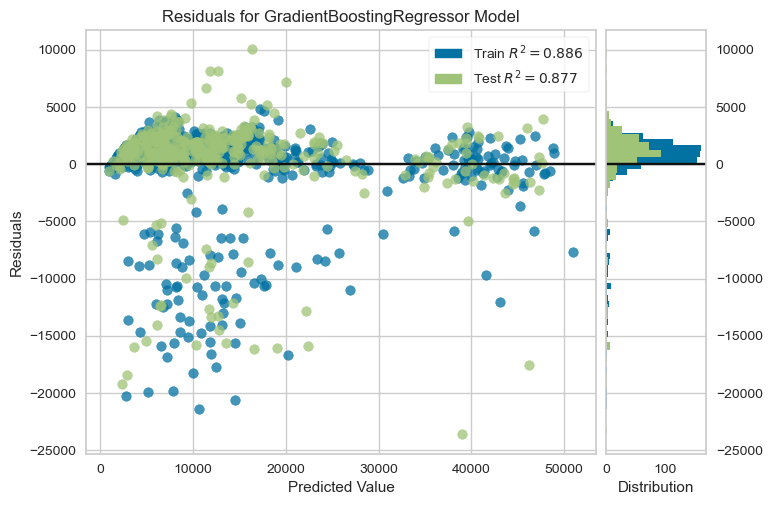

In [14]:
# Wykres residuals - różnice między wartościami rzeczywistymi a przewidywanymi
plot_model(finalny_model, plot='residuals')

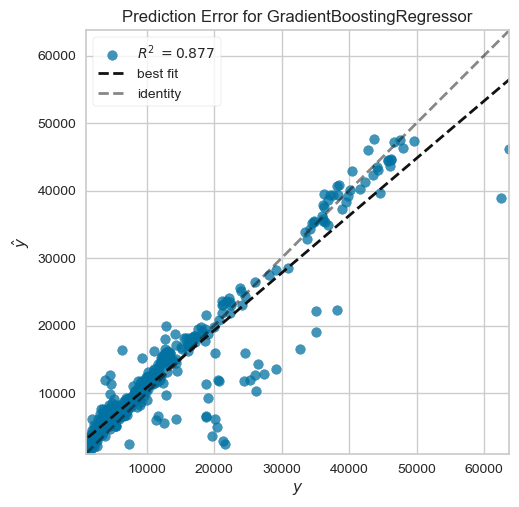

In [15]:
# Wykres prediction error - jak blisko są przewidywania
plot_model(finalny_model, plot='error')

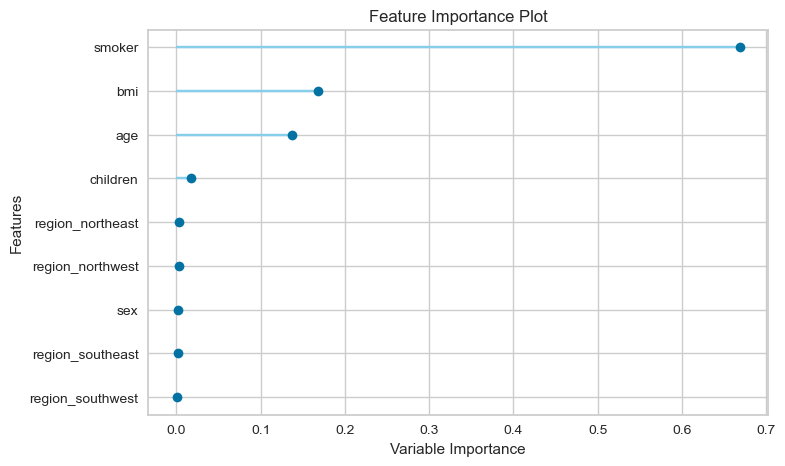

In [16]:
# Feature importance - które cechy są najważniejsze
plot_model(finalny_model, plot='feature')

## 📈 Szczegółowa ocena modelu

In [17]:
# Interaktywna ocena modelu (otworzy się w nowym oknie)
evaluate_model(finalny_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## 💾 Krok 7: Zapis modelu

Zapisujemy wytrenowany model, aby móc go użyć w aplikacji Streamlit.

In [18]:
# Zapisanie finalnego modelu do pliku
save_model(finalny_model, 'najlepszy_model_ubezpieczenia')

print("✅ Model zapisany jako 'najlepszy_model_ubezpieczenia.pkl'")
print("\n📝 Następne kroki:")
print("1. Możesz teraz uruchomić aplikację Streamlit")
print("2. Uruchom: streamlit run aplikacja.py")

Transformation Pipeline and Model Successfully Saved
✅ Model zapisany jako 'najlepszy_model_ubezpieczenia.pkl'

📝 Następne kroki:
1. Możesz teraz uruchomić aplikację Streamlit
2. Uruchom: streamlit run aplikacja.py


## 🧪 Bonus: Test modelu na przykładowych danych

In [19]:
# Stwórzmy przykładowy przypadek testowy
przykladowe_dane = pd.DataFrame({
    'age': [35],
    'sex': ['male'],
    'bmi': [27.5],
    'children': [2],
    'smoker': ['no'],
    'region': ['northwest']
})

print("Dane testowe:")
print(przykladowe_dane)

# Predykcja z finalnym modelem
predykcja = predict_model(finalny_model, data=przykladowe_dane)
print(f"\n💰 Przewidywany koszt ubezpieczenia: ${predykcja['prediction_label'].values[0]:.2f}")

Dane testowe:
   age   sex   bmi  children smoker     region
0   35  male  27.5         2     no  northwest



💰 Przewidywany koszt ubezpieczenia: $7350.94


## ✅ Podsumowanie

Gratulacje! Ukończyłeś proces trenowania modelu:

1. ✅ Wczytano i przeanalizowano dane
2. ✅ Skonfigurowano środowisko PyCaret
3. ✅ Porównano różne modele ML
4. ✅ Dostrojono hiperparametry
5. ✅ Oceniono model
6. ✅ Zapisano model do pliku

Model jest gotowy do użycia w aplikacji! 🎉